In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
product_df = pd.read_csv('data/product.csv')

In [3]:
product_df

,Unnamed: 0,Product ID,Country,Unit Price,Unit Profit,Unit Profit Percentage,Unit Weight(kg),Coffee Type,Roast Type,Price per 100g,Quantity
0,0,A-D-0.2,Ireland,2.985,0.26865,0.09,0.2,Ara,D,1.4925,27.0
1,1,A-D-0.2,United States,2.985,0.26865,0.09,0.2,Ara,D,1.4925,70.0
2,2,A-D-0.5,Ireland,5.970,0.53730,0.09,0.5,Ara,D,1.1940,16.0
3,3,A-D-0.5,United Kingdom,5.970,0.53730,0.09,0.5,Ara,D,1.1940,5.0
4,4,A-D-0.5,United States,5.970,0.53730,0.09,0.5,Ara,D,1.1940,68.0
...,...,...,...,...,...,...,...,...,...,...,...
126,126,R-M-1,United Kingdom,9.950,0.59700,0.06,1.0,Rob,M,0.9950,12.0
127,127,R-M-1,United States,9.950,0.59700,0.06,1.0,Rob,M,0.9950,51.0
128,128,R-M-2.5,Ireland,22.885,1.37310,0.06,2.5,Rob,M,0.9154,4.0
129,129,R-M-2.5,United Kingdom,22.885,1.37310,0.06,2.5,Rob,M,0.9154,6.0


I am adding new feature columns related to the current data already available to be able to look at the products in a different way than already recorded. These columns may be useful in solving questions or problems for other businesses looking to get into coffee sales.

In [4]:
product_df['Total Quantity'] = product_df.groupby('Country')['Quantity'].transform('sum')
product_df['Percent Purchased'] = product_df['Quantity'] / product_df['Total Quantity']
product_df['Total Unit Sales'] = product_df['Unit Price'] * product_df['Quantity']
product_df ['Total Unit Profit'] = product_df['Unit Profit'] * product_df['Quantity']
product_df['Total Unit Weight Sold'] = product_df['Unit Weight(kg)'] * product_df['Quantity']
product_df['Total Weight'] = product_df.groupby('Country')['Total Unit Weight Sold'].transform('sum')
product_df['Percent of Total Weight Shipped'] = product_df['Total Unit Weight Sold'] / product_df['Total Weight']

In [5]:
product_df.sort_values(by='Percent Purchased', ascending=False, inplace=True )

### Favorite Coffee by Country
In order to gain some meaningful insights about Coffee purchased from this seller, I would like to first break down the products by the Country they were purchased in.

In [6]:
ireland_prod = product_df[product_df['Country'] == 'Ireland'].head(10)
uk_prod= product_df[product_df['Country'] == 'United Kingdom'].head(10)
us_prod= product_df[product_df['Country'] == 'United States'].head(10)

### United States

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

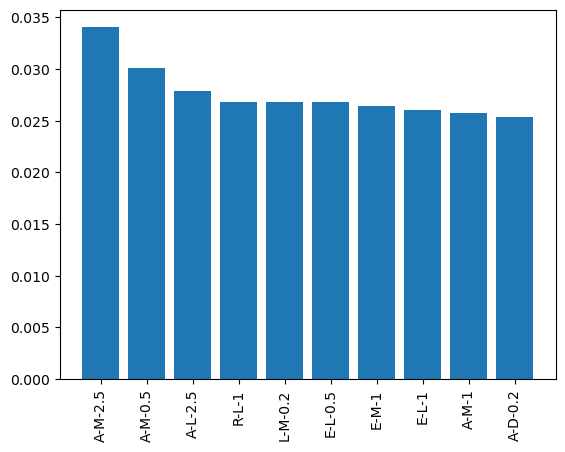

In [7]:
plt.bar(us_prod['Product ID'], us_prod['Percent Purchased'])
plt.xticks(rotation=90)

Medium Roast Arabica coffee appears to be the most popular coffee and roast type purchased in the U.S. as it occupies the number 1, 2 and 9 spot of top 10 in percent purchased coffee. Particulary, the 2.5kg and .5kg products are the most purchased in the U.S.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

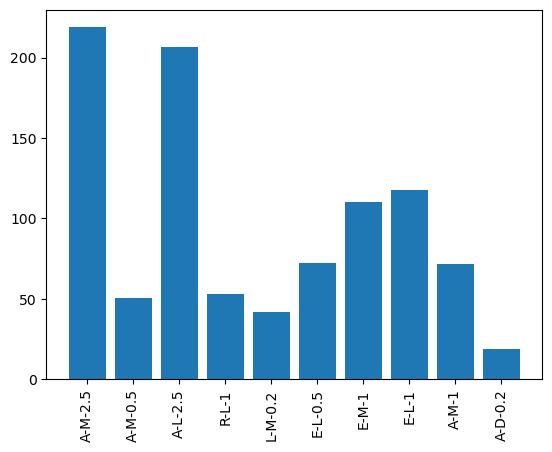

In [8]:
plt.bar(us_prod['Product ID'], us_prod['Total Unit Profit'])
plt.xticks(rotation=90)


The total profits gained by product appears to be motly determined by product size. The larger the product, the more total profit gained.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

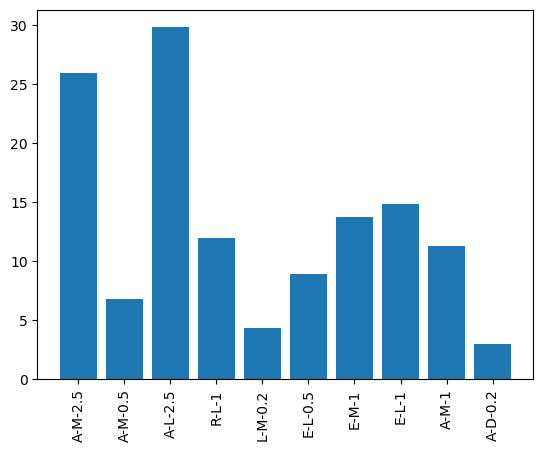

In [9]:
plt.bar(us_prod['Product ID'], us_prod['Unit Price'])
plt.xticks(rotation=90)

The inidividual price per product similarly is determined by product size. This graph and the total profit graphs are incredibly similar in their appearance, hinting at a strong correlation between the two. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

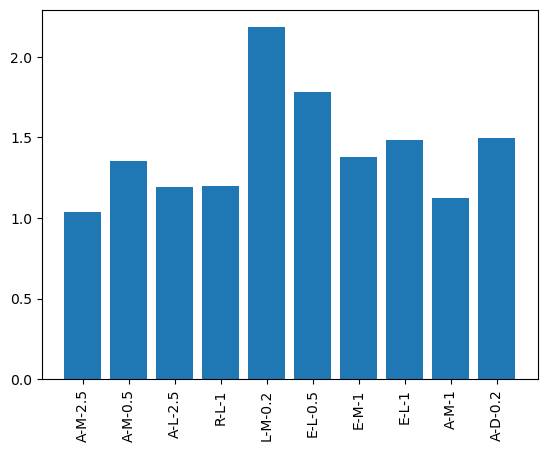

In [10]:
plt.bar(us_prod['Product ID'], us_prod['Price per 100g'])
plt.xticks(rotation=90)

Conversely, Price per 100g is higher the lower the product size. Coffee type does also play a role here, with product R-L-1 costing the same per 100g as A-L-2.5. Possible reasons for this is that labor costs don't get more expensive while filling larger bags and additionally the need for more bags at the smaller size are likely driving costs up. Shipping costs may also play a role as the initial cost to ship, especially internationally, is high and shipping in bulk may be more cost effective.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

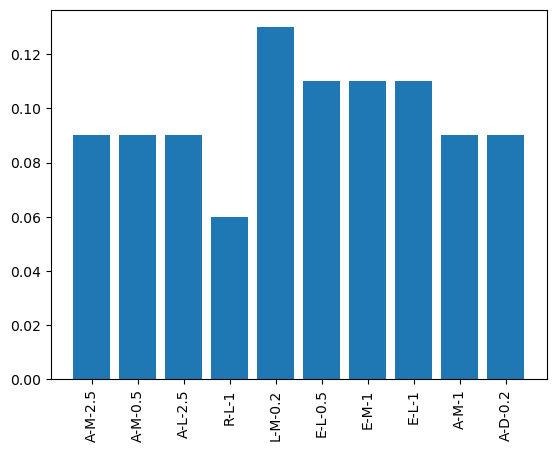

In [11]:
plt.bar(us_prod['Product ID'], us_prod['Unit Profit Percentage'])
plt.xticks(rotation=90)

As weight goes up, price per 100g goes down, relative to each coffee and roast type. Profit percentage is set by coffee type rather than roast or weight.

Prouct L-M-0.2 is the most profitable and 5th most purchased in the U.S.

### Ireland

In [20]:
ireland_prod.describe()

,Unnamed: 0,Unit Price,Unit Profit,Unit Profit Percentage,Unit Weight(kg),Price per 100g,Quantity,Total Quantity,Percent Purchased,Total Unit Sales,Total Unit Profit,Total Unit Weight Sold,Total Weight,Percent of Total Weight Shipped
count,10.000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.0,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
mean,64.800,12.149500,1.093405,0.088000,1.080000,1.383520,22.40000,537.0,0.041713,263.887500,24.198045,23.550000,544.3,0.043267
std,44.304,10.224191,1.094534,0.028206,1.027186,0.431234,4.40202,0.0,0.008197,224.220042,26.058917,23.350815,0.0,0.042901
min,0.000,2.685000,0.161100,0.060000,0.200000,0.823400,16.00000,537.0,0.029795,48.330000,2.899800,3.600000,544.3,0.006614
25%,27.000,3.802500,0.324000,0.060000,0.200000,1.105800,19.25000,537.0,0.035847,93.712500,7.890413,5.550000,544.3,0.010197
50%,79.000,9.340000,0.954000,0.090000,0.750000,1.266950,22.00000,537.0,0.040968,204.870000,19.021500,15.250000,544.3,0.028018
75%,102.000,18.251250,1.210050,0.105000,2.125000,1.682625,25.50000,537.0,0.047486,383.257500,26.314875,35.250000,544.3,0.064762
max,116.000,29.785000,3.872050,0.130000,2.500000,2.227500,30.00000,537.0,0.055866,714.840000,92.929200,65.000000,544.3,0.119419


Median weight is .75kg, between .5kg and 1kg bags. Mean weight is 1.08kg

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

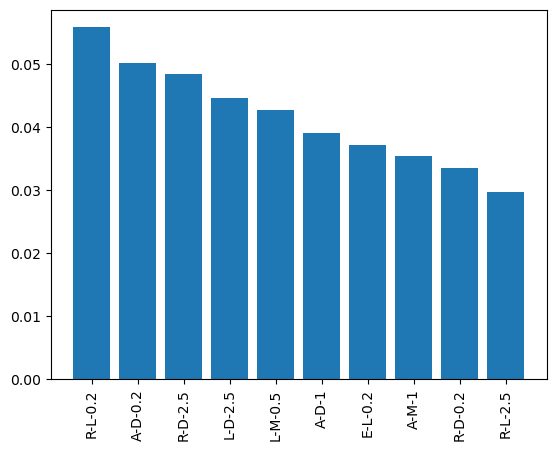

In [12]:
plt.bar(ireland_prod['Product ID'], ireland_prod['Percent Purchased'])
plt.xticks(rotation=90)

The most purchased product in Ireland is a light roast Robusta .2kg bag, followed by an dark roast Arabica .2kg bag. 

,Unnamed: 0,Unit Price,Unit Profit,Unit Profit Percentage,Unit Weight(kg),Price per 100g,Quantity,Total Quantity,Percent Purchased,Total Unit Sales,Total Unit Profit,Total Unit Weight Sold,Total Weight,Percent of Total Weight Shipped
count,10.000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.0,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
mean,64.800,12.149500,1.093405,0.088000,1.080000,1.383520,22.40000,537.0,0.041713,263.887500,24.198045,23.550000,544.3,0.043267
std,44.304,10.224191,1.094534,0.028206,1.027186,0.431234,4.40202,0.0,0.008197,224.220042,26.058917,23.350815,0.0,0.042901
min,0.000,2.685000,0.161100,0.060000,0.200000,0.823400,16.00000,537.0,0.029795,48.330000,2.899800,3.600000,544.3,0.006614
25%,27.000,3.802500,0.324000,0.060000,0.200000,1.105800,19.25000,537.0,0.035847,93.712500,7.890413,5.550000,544.3,0.010197
50%,79.000,9.340000,0.954000,0.090000,0.750000,1.266950,22.00000,537.0,0.040968,204.870000,19.021500,15.250000,544.3,0.028018
75%,102.000,18.251250,1.210050,0.105000,2.125000,1.682625,25.50000,537.0,0.047486,383.257500,26.314875,35.250000,544.3,0.064762
max,116.000,29.785000,3.872050,0.130000,2.500000,2.227500,30.00000,537.0,0.055866,714.840000,92.929200,65.000000,544.3,0.119419


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

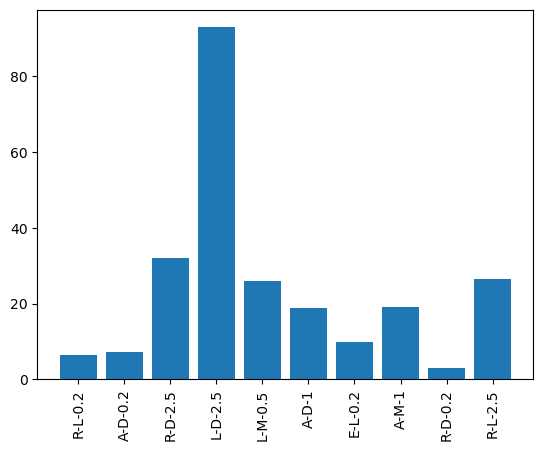

In [21]:
plt.bar(ireland_prod['Product ID'], ireland_prod['Total Unit Profit'])
plt.xticks(rotation=90)

The dark roast liberica 2.5kg bag is far and away bringing in the most total profit.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

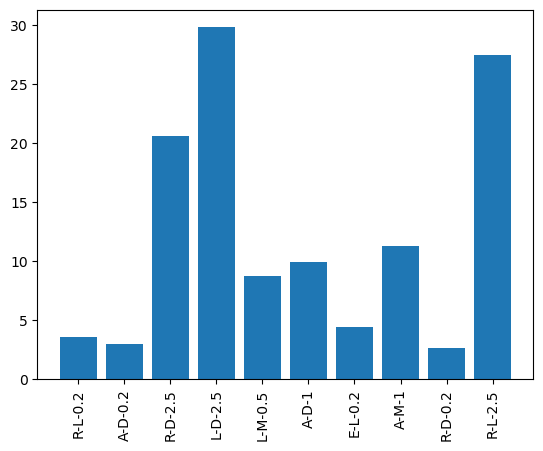

In [14]:
plt.bar(ireland_prod['Product ID'], ireland_prod['Unit Price'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

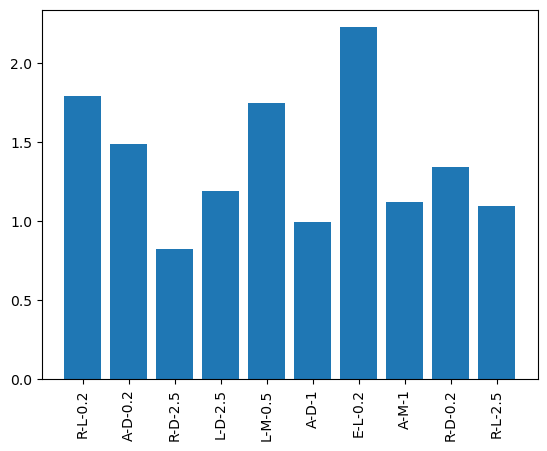

In [15]:
plt.bar(ireland_prod['Product ID'], ireland_prod['Price per 100g'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

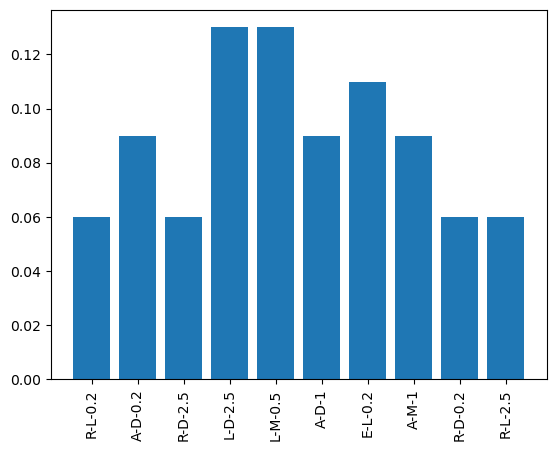

In [16]:
plt.bar(ireland_prod['Product ID'], ireland_prod['Unit Profit Percentage'])
plt.xticks(rotation=90)